In [1]:
import pandas as pd
import numpy as np

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')


In [3]:
match.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
524,525,IPL-2015,Bangalore,13-04-2015,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,DA Warner,M Chinnaswamy Stadium,RM Deshpande,RK Illingworth,NaN
337,338,IPL-2012,Jaipur,23-04-2012,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Royal Challengers Bangalore,46,0,AB de Villiers,Sawai Mansingh Stadium,Asad Rauf,S Asnani,NaN
172,173,IPL-2009,Johannesburg,23-05-2009,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
344,345,IPL-2012,Delhi,29-04-2012,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
563,564,IPL-2015,Hyderabad,11-05-2015,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,5,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Features we will consider to give our final prediction: batting team, bowling team, city, runs left, balls left, wickets left, total runs (target), current run rate, req run rate

Since we want to find out probability, we will use models that give us prob ex. logreg

In [6]:
delivery.groupby(['match_id', 'inning']).sum().total_runs

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [7]:
#use reset index to convert to df
total_score_df = delivery.groupby(['match_id','inning']).sum().total_runs.reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [8]:
# we remove the 2nd innings runs as we only want the the target to be chased (1st innings runs)

total_score_df = total_score_df[total_score_df['inning']==1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [10]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id',right_on='match_id')

In [11]:
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207


In [12]:
match_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

A lot of these teams have stopped playing and few have been renamed

In [13]:
teams = ['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
match_df= match_df[match_df['team1'].isin(teams)]
match_df= match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape

(641, 20)

In [17]:
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207


In [18]:
#since we dont want duckworth lewis applied, matches where it rained

match_df = match_df[match_df.dl_applied == 0]

In [19]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

In [20]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [21]:
delivery_df = match_df.merge(delivery, on='match_id')

In [22]:
delivery_df = delivery_df[delivery_df.inning==2]

In [23]:
delivery_df.head().columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [24]:
delivery_df['current_score']  = delivery_df.groupby('match_id').cumsum().total_runs_y

In [25]:
delivery_df.current_score

125         1
126         1
127         1
128         3
129         7
         ... 
149573    152
149574    154
149575    155
149576    157
149577    157
Name: current_score, Length: 72413, dtype: int64

In [26]:
delivery_df['runs_left'] = delivery_df.total_runs_x - delivery_df.current_score

In [27]:
delivery_df['balls_left'] = 126 - (delivery_df.over*6 + delivery_df.ball)

In [28]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [38]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'crr', 'rrr', 'result'],
      dtype='object')

In [39]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == 0 else 1)
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.tail(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,wickets_left
149568,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,3,RA Jadeja,...,NaN,NaN,140,12,9,5,7.567568,8.000000,0,5
149569,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,...,NaN,NaN,140,12,8,5,7.500000,9.000000,0,5
149570,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,5,RA Jadeja,...,NaN,NaN,142,10,7,5,7.539823,8.571429,0,5
149571,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,...,NaN,NaN,150,2,6,5,7.894737,2.000000,0,5
149572,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,...,NaN,NaN,151,1,5,5,7.878261,1.200000,0,5
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,NaN,152,0,4,5,7.862069,0.000000,0,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,lbw,NaN,157,-5,0,3,7.850000,-inf,0,3


In [40]:
#crr = runs/overs
delivery_df['crr'] =  (delivery_df['current_score'])/((120-delivery_df['balls_left'])/6)

In [41]:
#rrr = runs left/overs left
delivery_df['rrr'] = delivery_df.runs_left / (delivery_df.balls_left/6)

In [42]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,1,206,119,10,6.000000,10.386555,0,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,1,206,118,10,3.000000,10.474576,0,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,1,206,117,10,2.000000,10.564103,0,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,3,204,116,10,4.500000,10.551724,0,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,7,200,115,10,8.400000,10.434783,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,NaN,152,0,4,5,7.862069,0.000000,0,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0,4


In [43]:
def result(row):
    return 1 if row.batting_team == row.winner else 0

In [44]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

In [45]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,1,206,119,10,6.000000,10.386555,0,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,1,206,118,10,3.000000,10.474576,0,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,1,206,117,10,2.000000,10.564103,0,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,3,204,116,10,4.500000,10.551724,0,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,7,200,115,10,8.400000,10.434783,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,NaN,152,0,4,5,7.862069,0.000000,0,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0,4


In [46]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [47]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [48]:
#shuffling since all the balls of 1 match are together, we want the model to give independent predictions after each ball
final_df = final_df.sample(final_df.shape[0])

In [49]:
final_df.dropna(inplace=True)

In [50]:
final_df = final_df[final_df['balls_left']!=0]  #when balls left are 0, rrr becomes infinity and model cannot handle inf values

In [51]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [52]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
79196,Kolkata Knight Riders,Chennai Super Kings,Chennai,178,110,10,200,13.200000,9.709091
31771,Kolkata Knight Riders,Rajasthan Royals,Durban,82,98,8,101,5.181818,5.020408
100188,Chennai Super Kings,Mumbai Indians,Mumbai,69,47,7,173,8.547945,8.808511
39852,Mumbai Indians,Kings XI Punjab,Mumbai,68,44,7,163,7.500000,9.272727
1581,Mumbai Indians,Royal Challengers Bangalore,Bangalore,134,98,6,142,2.181818,8.204082
...,...,...,...,...,...,...,...,...,...
66866,Mumbai Indians,Chennai Super Kings,Mumbai,143,94,9,173,6.923077,9.127660
18199,Delhi Daredevils,Mumbai Indians,Delhi,141,102,9,176,11.666667,8.294118
11008,Royal Challengers Bangalore,Delhi Daredevils,Delhi,94,55,7,191,8.953846,10.254545
51868,Kings XI Punjab,Delhi Daredevils,Delhi,43,11,5,231,10.348624,23.454545


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
],
                        
remainder='passthrough')




Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', RandomForestClassifier())
    
])

In [56]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [57]:
y_pred = pipe.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9977573761300722

We will still use logreg because it gives us accurate probabilities (even though RF can get probabilies using pipe.predict_proba but the values will be rounded off, and not very smooth and accurate)

Logistic Regression


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver = 'liblinear'))
    
])


In [60]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8000560655967482

In [64]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [67]:
temp_df,target = match_progression(delivery_df,27,pipe)
temp_df

Target- 131


,end_of_over,runs_after_over,wickets_in_over,lose,win
3518,1,3,1,19.1,80.9
3525,2,4,1,31.8,68.2
3531,3,11,1,36.6,63.4
3539,4,6,0,35.2,64.8
3545,5,4,1,52.3,47.7
3551,6,11,0,42.8,57.2
3557,7,1,2,77.6,22.4
3564,8,3,1,88.2,11.8
3570,9,5,1,93.4,6.6


Text(0.5, 1.0, 'Target-131')

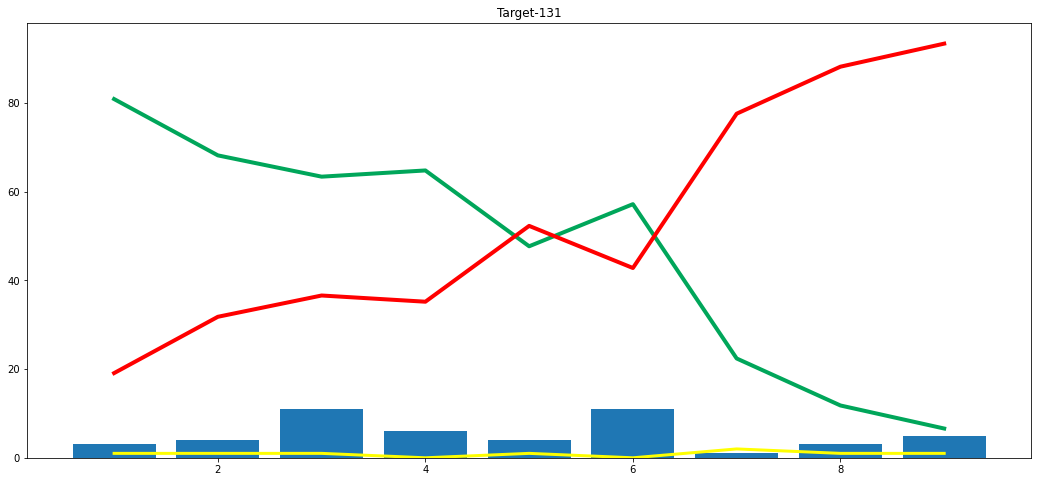

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [61]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [62]:
delivery_df.city.unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [63]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))
